In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from learning import utils

plt.style.use('fivethirtyeight')

plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='white'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [2]:
data = pd.read_csv('data/chembl_data/jak2_extracted_chembl_data.csv')
data.dropna(axis='index', subset=['pchembl_value'],inplace=True)
data

,chembl_id,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles
0,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...
1,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...
2,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
3,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
4,CHEMBL386760,240.0,=,IC50,6.62,356252,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...
...,...,...,...,...,...,...,...
12681,CHEMBL4289006,4.3,=,IC50,8.37,2328454,Cc1cnc(Nc2ccc(N3CCN(C)CC3)cc2)nc1-c1ccc(NC(=O)...
12682,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2
12683,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2
12684,CHEMBL4116008,6.0,=,IC50,8.22,2255359,CCS(=O)(=O)N1CCN(c2ccc(Nc3ncc(C(N)=O)c(NC4CC4)...


Drop duplicates that contain literally the same information

In [3]:
data.drop_duplicates(keep='first', inplace=True)
data

,chembl_id,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles
0,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...
2,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
4,CHEMBL386760,240.0,=,IC50,6.62,356252,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...
6,CHEMBL557844,141.0,=,IC50,6.85,367970,COC[C@H](C)Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1
8,CHEMBL221378,28.0,=,IC50,7.55,367986,C[C@H](Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1)c1c...
...,...,...,...,...,...,...,...
12676,CHEMBL4292408,4.6,=,IC50,8.34,2331856,CN1CCN(c2ccc(Nc3nccc(-c4ccc(NC(=O)CCCCCCC(=O)N...
12678,CHEMBL4281785,1.8,=,IC50,8.74,2321233,Cc1cnc(Nc2ccc(N3CCOCC3)cc2)nc1-c1ccc(NC(=O)CCC...
12680,CHEMBL4289006,4.3,=,IC50,8.37,2328454,Cc1cnc(Nc2ccc(N3CCN(C)CC3)cc2)nc1-c1ccc(NC(=O)...
12682,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2


Create a dataframe containing all duplicates based on chembl_id

In [4]:
index_duplicate = data.duplicated(subset = ['chembl_id', 'standard_type'], keep = False)
duplicated_df = data[index_duplicate == True]
duplicated_df

,chembl_id,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles
2,CHEMBL535,940.00,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
104,CHEMBL495727,1.20,=,IC50,8.92,494066,O=C(Nc1c[nH]nc1-c1nc2ccc(CN3CCOCC3)cc2[nH]1)NC...
118,CHEMBL498859,370.00,=,IC50,6.43,473247,Nc1n[nH]c2ccc(-c3ccccc3Cl)cc12
128,CHEMBL480411,78.00,=,IC50,7.11,473316,CC(C)(C)NS(=O)(=O)c1ccc(-c2ccc3[nH]nc(N)c3c2)cc1
152,CHEMBL480411,206.00,=,IC50,6.69,473316,CC(C)(C)NS(=O)(=O)c1ccc(-c2ccc3[nH]nc(N)c3c2)cc1
...,...,...,...,...,...,...,...
12586,CHEMBL221959,1.09,=,IC50,8.96,367860,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...
12624,CHEMBL2208023,27.40,=,IC50,7.56,1447673,CC(=O)Nc1ccc(-c2ccnc(Nc3ccccc3)n2)cc1
12658,CHEMBL2208028,28.70,=,IC50,7.54,1447678,CC(=O)Nc1ccc(-c2nc(Nc3ccc(N4CCOCC4)cc3)ncc2C)cc1
12660,CHEMBL2208025,19.60,=,IC50,7.71,1447675,CC(=O)Nc1ccc(-c2ccnc(Nc3cccc(N4CCOCC4)c3)n2)cc1


In [5]:
list_duplicates = duplicated_df.chembl_id.unique()

In [6]:
# Keep only the first duplicate based on standard type & chembl_id (for easier manipulation later)
data = data.drop_duplicates(subset = ['chembl_id', 'standard_type'], keep = 'first')
data

,chembl_id,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles
0,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...
2,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
4,CHEMBL386760,240.0,=,IC50,6.62,356252,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...
6,CHEMBL557844,141.0,=,IC50,6.85,367970,COC[C@H](C)Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1
8,CHEMBL221378,28.0,=,IC50,7.55,367986,C[C@H](Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1)c1c...
...,...,...,...,...,...,...,...
12676,CHEMBL4292408,4.6,=,IC50,8.34,2331856,CN1CCN(c2ccc(Nc3nccc(-c4ccc(NC(=O)CCCCCCC(=O)N...
12678,CHEMBL4281785,1.8,=,IC50,8.74,2321233,Cc1cnc(Nc2ccc(N3CCOCC3)cc2)nc1-c1ccc(NC(=O)CCC...
12680,CHEMBL4289006,4.3,=,IC50,8.37,2328454,Cc1cnc(Nc2ccc(N3CCN(C)CC3)cc2)nc1-c1ccc(NC(=O)...
12682,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2


In [7]:
standard_list = ['Kd', 'IC50', 'Ki']

In [8]:
#TODO: fix the pandas settingwithcopy error
for standard in standard_list:
    for chemb in list_duplicates:
        mask = (data.chembl_id==chemb) & (data.standard_type==standard)
        mask_dupl = (duplicated_df.chembl_id==chemb) & (duplicated_df.standard_type==standard)
        test_mean = duplicated_df.loc[mask_dupl,'pchembl_value'].mean()
        data.loc[mask,'pchembl_value'] = test_mean
        data.loc[mask,'standard_value'] = duplicated_df.loc[mask_dupl,'standard_value'].mean()

/home/sabsr3/anaconda3/envs/docking/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


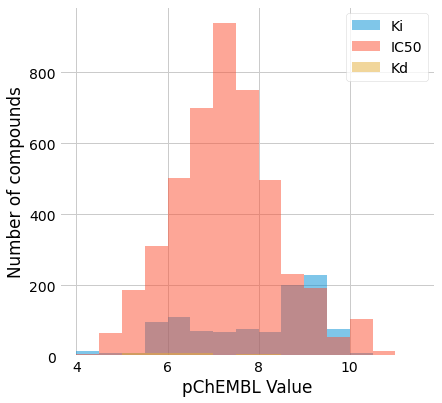

In [29]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
data[(data['standard_type']=='Ki') & (data['standard_relation']=='=')]['pchembl_value'].hist(ax=ax, alpha=0.5, label='Ki', bins=np.arange(4,12,0.5))
data[(data['standard_type']=='IC50') & (data['standard_relation']=='=')]['pchembl_value'].hist(ax=ax, alpha=0.5, label='IC50', bins=np.arange(4,12,0.5))
data[(data['standard_type']=='Kd') & (data['standard_relation']=='=')]['pchembl_value'].hist(ax=ax, alpha=0.5, label='Kd', bins=np.arange(4,12,0.5))
ax.set_xlabel('pChEMBL Value')
ax.set_ylabel('Number of compounds')
ax.legend(loc='best');

In [21]:
#better_df = utils.load('/home/sabsr3/Desktop/JAK2DUDE', ['jak2'])
#better_df

,chembl_id,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles,target
0,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...,jak2
1,CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...,jak2
2,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,jak2
3,CHEMBL535,940.0,=,Kd,6.03,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,jak2
4,CHEMBL386760,240.0,=,IC50,6.62,356252,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,jak2
...,...,...,...,...,...,...,...,...
12681,CHEMBL4289006,4.3,=,IC50,8.37,2328454,Cc1cnc(Nc2ccc(N3CCN(C)CC3)cc2)nc1-c1ccc(NC(=O)...,jak2
12682,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2,jak2
12683,CHEMBL4291402,10000.0,=,IC50,5.00,2330850,COc1cccc(OCc2cc(C)ccn2)c1-c1ccc2c(c1)CCNCC2,jak2
12684,CHEMBL4116008,6.0,=,IC50,8.22,2255359,CCS(=O)(=O)N1CCN(c2ccc(Nc3ncc(C(N)=O)c(NC4CC4)...,jak2


In [12]:
data = data.set_index('chembl_id')
data

,standard_value,standard_relation,standard_type,pchembl_value,molregno,canonical_smiles
chembl_id,,,,,,
CHEMBL607707,2000.0,=,Kd,5.70,604615,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...
CHEMBL535,675.0,=,Kd,6.21,13048,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
CHEMBL386760,240.0,=,IC50,6.62,356252,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...
CHEMBL557844,141.0,=,IC50,6.85,367970,COC[C@H](C)Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1
CHEMBL221378,28.0,=,IC50,7.55,367986,C[C@H](Nc1cc(-c2ccoc2)nc(-n2cnc3ccncc32)n1)c1c...
...,...,...,...,...,...,...
CHEMBL4292408,4.6,=,IC50,8.34,2331856,CN1CCN(c2ccc(Nc3nccc(-c4ccc(NC(=O)CCCCCCC(=O)N...
CHEMBL4281785,1.8,=,IC50,8.74,2321233,Cc1cnc(Nc2ccc(N3CCOCC3)cc2)nc1-c1ccc(NC(=O)CCC...
CHEMBL4289006,4.3,=,IC50,8.37,2328454,Cc1cnc(Nc2ccc(N3CCN(C)CC3)cc2)nc1-c1ccc(NC(=O)...


### Drawing molecules using RDKit

In [13]:
from rdkit import Chem

mols = {}
for chembl_id, row in data.iterrows():
    mols[chembl_id] = Chem.MolFromSmiles(row['canonical_smiles'])

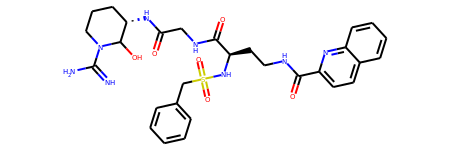

In [5]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

mols['CHEMBL117716']

### Descriptor calculation using RDKit

In [14]:
from rdkit.Chem import Descriptors

In [15]:
descriptors = {}

descriptors['n_atoms'] = {chembl_id: Descriptors.HeavyAtomCount(mol) for chembl_id, mol in mols.items()}
descriptors['rotatable_bonds'] = {chembl_id: Descriptors.NumRotatableBonds(mol) for chembl_id, mol in mols.items()}
descriptors['logp'] = {chembl_id: Descriptors.MolLogP(mol) for chembl_id, mol in mols.items()}
descriptors['molecular_weight'] = {chembl_id: Descriptors.ExactMolWt(mol) for chembl_id, mol in mols.items()}
descriptors['hb_donors'] = {chembl_id: Descriptors.NumHDonors(mol) for chembl_id, mol in mols.items()}
descriptors['hb_acceptors'] = {chembl_id: Descriptors.NumHAcceptors(mol) for chembl_id, mol in mols.items()}

descriptors = pd.DataFrame.from_dict(descriptors)

descriptors

,n_atoms,rotatable_bonds,logp,molecular_weight,hb_donors,hb_acceptors
CHEMBL607707,33,8,5.09758,467.152431,2,6
CHEMBL535,29,7,3.33494,398.211804,3,3
CHEMBL386760,50,14,6.22484,686.342798,1,12
CHEMBL557844,26,6,2.91730,350.149124,1,8
CHEMBL221378,30,5,4.78270,400.144787,1,7
...,...,...,...,...,...,...
CHEMBL4292408,39,12,4.42350,531.295788,4,8
CHEMBL4281785,39,12,4.81672,532.279804,4,8
CHEMBL4289006,40,12,4.73192,545.311438,4,8
CHEMBL4291402,28,5,4.33282,374.199428,1,4


Let's compute the ligand efficiency for each of our molecules.

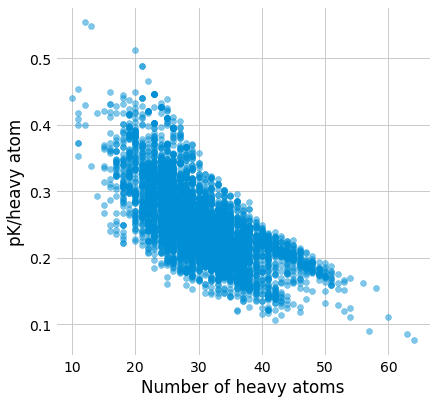

In [16]:
ligand_efficiency = data['pchembl_value'] / descriptors.loc[data.index]['n_atoms']

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(descriptors.loc[data.index]['n_atoms'], ligand_efficiency, alpha=0.5)
ax.set_xlabel('Number of heavy atoms')
ax.set_ylabel('pK/heavy atom');

Let's check how many of our molecules have Lipinski RO5 violations.

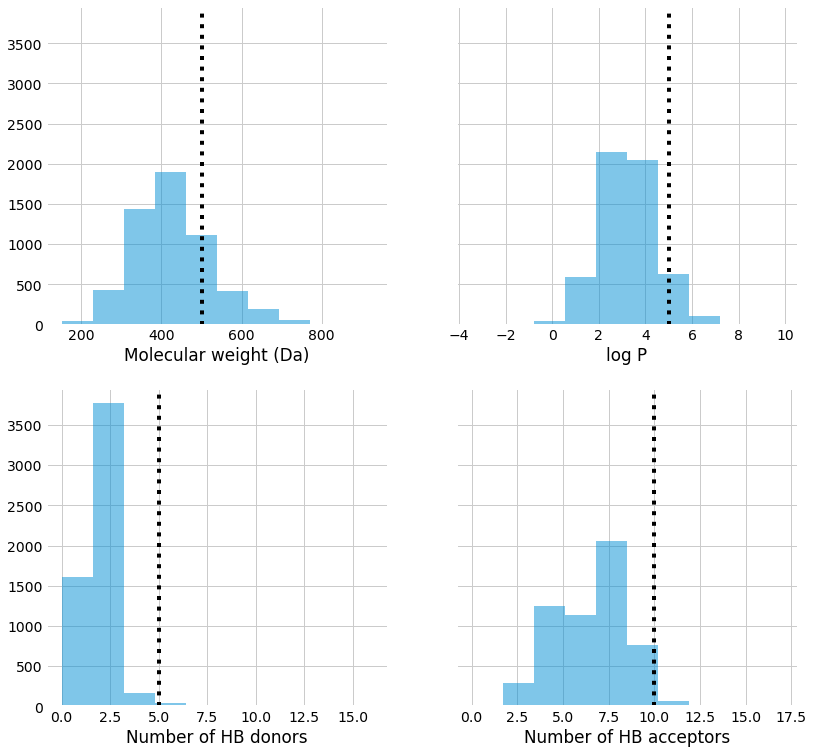

In [17]:
fig, axes = plt.subplots(2,2,figsize=(12,12), sharey=True)
axes = axes.flat
descriptors['molecular_weight'].hist(ax=axes[0], alpha=0.5)
axes[0].axvline(500, color='k', linestyle=':')
axes[0].set_xlabel('Molecular weight (Da)')
descriptors['logp'].hist(ax=axes[1], alpha=0.5)
axes[1].set_xlabel('log P')
axes[1].axvline(5, color='k', linestyle=':')
descriptors['hb_donors'].hist(ax=axes[2], alpha=0.5)
axes[2].set_xlabel('Number of HB donors')
axes[2].axvline(5, color='k', linestyle=':')
descriptors['hb_acceptors'].hist(ax=axes[3], alpha=0.5)
axes[3].set_xlabel('Number of HB acceptors')
axes[3].axvline(10, color='k', linestyle=':');